# Regulazied Regression Coefficient Behavior

Derive and plot the OLS, Ridge, and LASSO regression coefficients to understand the differences in their behavior. 

Assume that $\boldsymbol{X}$, the matrix of features, is $\boldsymbol{I}_{nxn}$, the identity matrix (1s on the diagonal, 0s everywhere else), for simplicity.

Let PRSS = Penalized Residual Sum of Squares (i.e. the expression that is minimized to find the coefficients).

### Ridge Regression

The PRSS expression for Ridge regression is:

$$PRSS=(\boldsymbol{Y}-\boldsymbol{X}\boldsymbol{\beta})^{T}(\boldsymbol{Y}-\boldsymbol{X}\boldsymbol{\beta})+\lambda\boldsymbol{\beta}^{T}\boldsymbol{\beta}$$

Derive the coefficients by minimizing the PRSS.

$$minimize_{\boldsymbol{\beta}}\Big((\boldsymbol{Y}-\boldsymbol{X}\boldsymbol{\beta})^{T}(\boldsymbol{Y}-\boldsymbol{X}\boldsymbol{\beta})+\lambda\boldsymbol{\beta}^{T}\boldsymbol{\beta}\Big)$$

Take the derivative with respect to $\boldsymbol{\beta}$, set equal to zero, and solve.

\begin{align*} 
\frac{dPRSS}{d\boldsymbol{\beta}}&=-\boldsymbol{X}^{T}(\boldsymbol{Y}-\boldsymbol{X}\boldsymbol{\beta})-(\boldsymbol{Y}-\boldsymbol{X}\boldsymbol{\beta})^{T}\boldsymbol{X}+\lambda(\boldsymbol{I}^{T}\boldsymbol{\beta}+\boldsymbol{\beta}^{T}\boldsymbol{I})\\ 
&=-2\boldsymbol{X}^{T}(\boldsymbol{Y}-\boldsymbol{X}\boldsymbol{\beta})+2\lambda\boldsymbol{I}\boldsymbol{\beta}\\
&\rightarrow -2\boldsymbol{X}^{T}(\boldsymbol{Y}-\boldsymbol{X}\boldsymbol{\beta})+2\lambda\boldsymbol{I}\boldsymbol{\beta}=0\\
&\rightarrow \boldsymbol{X}^{T}(\boldsymbol{Y}-\boldsymbol{X}\boldsymbol{\beta})=\lambda\boldsymbol{I}\boldsymbol{\beta}\\
&\rightarrow \boldsymbol{X}^{T}\boldsymbol{Y}-\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{\beta}=\lambda\boldsymbol{I}\boldsymbol{\beta}\\
&\rightarrow \boldsymbol{X}^{T}\boldsymbol{Y}=\boldsymbol{X}^{T}\boldsymbol{X}\boldsymbol{\beta}+\lambda\boldsymbol{I}\boldsymbol{\beta}\\
&\rightarrow \boldsymbol{X}^{T}\boldsymbol{Y}=(\boldsymbol{X}^{T}\boldsymbol{X}+\lambda\boldsymbol{I})\boldsymbol{\beta}
\end{align*}

The general Ridge regression coefficient solution.

$$\hat{\boldsymbol{\beta}}=(\boldsymbol{X}^{T}\boldsymbol{X}+\lambda\boldsymbol{I})^{-1}\boldsymbol{X}^{T}\boldsymbol{Y}$$

Using the simplicity assumption, replace $\boldsymbol{X}$ and simplify to get the desired solution.

\begin{align*}
\hat{\boldsymbol{\beta}}&=(\boldsymbol{X}^{T}\boldsymbol{X}+\lambda\boldsymbol{I})^{-1}\boldsymbol{X}^{T}\boldsymbol{Y}\\
&\rightarrow (\boldsymbol{I}^{T}\boldsymbol{I}+\lambda\boldsymbol{I})^{-1}\boldsymbol{I}^{T}\boldsymbol{Y}\\
&=(\boldsymbol{I}+\lambda\boldsymbol{I})^{-1}\boldsymbol{I}\boldsymbol{Y}\\
&=((1-\lambda)\boldsymbol{I})^{-1}\boldsymbol{Y}\\
&=\frac{1}{1-\lambda}\boldsymbol{I}\boldsymbol{Y}\\
&=\begin{bmatrix}\frac{y_{1}}{1-\lambda} \\ \vdots \\ \frac{y_{n}}{1-\lambda}\end{bmatrix}
\end{align*}

The Ridge coefficients are $\hat{\beta}_{i}^{ridge}=\frac{y_{i}}{1-\lambda}$ where $i=1,\dots,n$.

Confirm the coefficients minimize the PRSS by checking that the second derivative is strictly greater than zero.

$$\frac{dPRSS^{2}}{d^{2}\boldsymbol{\beta}}=2\boldsymbol{X}^{T}\boldsymbol{X}+2\lambda\boldsymbol{I}>0$$

### LASSO (Least Absolute Shrinkage and Selection Operator) Regression

The PRSS expression for LASSO regression is:

$$PRSS=(\boldsymbol{Y}-\boldsymbol{X}\boldsymbol{\beta})^{T}(\boldsymbol{Y}-\boldsymbol{X}\boldsymbol{\beta})+\lambda||\boldsymbol{\beta}||_{1}$$

Given the norm (absolute value) in the regularization term, the solution is a tiny bit trickier to find, so I'll skip the work here and just provide the solution under the simplicity assumption stated previously.

The LASSO coefficients are $\hat{\beta}_{i}^{lasso}=\left\{\begin{array}{ll} y_{i}+\lambda/2 & y_{i}<-\lambda/2\\ 0 & |y_{i}|\leq \lambda/2\\ y_{i}-\lambda/2 & y_{i}>\lambda/2\\ \end{array}\right.$ where $i=1,\dots,n$.

### Ordinary Least Squares (OLS) Regression (For Comparison)

The solution to ordinary least squares (OLS) regression has the following solution given the above simplicity assumption.

\begin{align*} 
\hat{\boldsymbol{\beta}}&=(\boldsymbol{X}^{T}\boldsymbol{X})^{-1}\boldsymbol{X}^{T}\boldsymbol{Y}\\
&\rightarrow (\boldsymbol{I}^{T}\boldsymbol{I})^{-1}\boldsymbol{I}^{T}\boldsymbol{Y}\\
&=(\boldsymbol{I})^{-1}\boldsymbol{I}\boldsymbol{Y}\\
&=\boldsymbol{I}\boldsymbol{I}\boldsymbol{Y}\\
&=\boldsymbol{I}\boldsymbol{Y}\\
&=\begin{bmatrix}y_{1} \\ \vdots \\ y_{n}\end{bmatrix}
\end{align*}

The OLS coefficients are $\hat{\beta}_{i}^{ols}=y_{i}$ where $i=1,\dots,n$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (20, 10)

In [3]:
sns.set(font_scale=2.5)
sns.set_style("whitegrid")

In [4]:
def do_ridge_coefs(yVal, lVal):
    """
    Compute ridge regression coefficient for specific 
    y and lambda values.

    Parameters
    ----------
    yVal : double
        the y value used to compute coefficient
    lVal : double
        the lambda value used to compute coefficient

    Returns
    -------
    double
        the ridge regression coefficient
    """
    return yVal / (1 + lVal)


def do_lasso_coefs(yVal, lVal):
    """
    Compute lasso regression coefficient for specific 
    y and lambda values.

    Parameters
    ----------
    yVal : double
        the y value used to compute coefficient
    lVal : double
        the lambda value used to compute coefficient

    Returns
    -------
    double
        the lasso regression coefficient
    """
    if yVal < -lVal / 2.:
        coef = yVal + lVal / 2.
    elif abs(yVal) <= lVal / 2.:
        coef = 0.0
    else:
        coef = yVal - lVal / 2.
    return coef


def coefs_by_y_and_l(yVal, lVal):
    """
    Use the input vectors and the coefficient functions (do_ridge_coefs 
    and do_lasso_coefs) to build 2d-arrays of regularized coefficients 
    at various y and lambda value combinations.

    Parameters
    ----------
    yVal : 1d-array
        the y value vector used to build the 2d-array of coefficients
    lVal : 1d-array
        the lambda value vector used to build the 2d-array of coefficients

    Returns
    -------
    tuple
        two 2d-arrays containing the ridge and lasso coefficients
        for various y value and lambda value combinations
    """
    coef_ridge = []
    coef_lasso = []
    for l in range(len(lVal)):
        coef_ridge.append([do_ridge_coefs(y, l) for y in yVal])
        coef_lasso.append([do_lasso_coefs(y, l) for y in yVal])
    return np.array(coef_ridge), np.array(coef_lasso)


def coefs_by_y(yVal, lVal):
    """
    Use the input vector, the input lambda value and the coefficient 
    functions (do_ridge_coefs and do_lasso_coefs) to build 2d-arrays 
    of ols, ridge, and lasso coefficients for various y values.

    Parameters
    ----------
    yVal : 1d-array
        the y value vector used to build the 2d-array of coefficients
    lVal : double
        the single lambda value used to build the 2d-array of coefficients

    Returns
    -------
    2d-array
        contains the ols, ridge, and lasso coefficients
        for various y values
    """
    ols_coefs = yVal
    ridge_coefs = [do_ridge_coefs(y, lVal) for y in yVal]
    lasso_coefs = [do_lasso_coefs(y, lVal) for y in yVal]
    coefs = np.array([ols_coefs, ridge_coefs, lasso_coefs])
    return coefs

Plotting the coefficient values with respect to lambda, the penalization parameter. The coefficients become smaller as the value for lambda (aka the amount of penalization) increases. As expected, given the power of two in the penalization term, the Ridge coefficients decrease or increase exponentially toward zero as lambda increases. Notice that the coefficients, besides the coefficient that starts at zero, don't ever get to zero. This is because Ridge regression is not a selection operator, it is strictly a shrinkage methodology. In the Lasso regression case, the coefficients linearly decrease or increase to zero at which point the coefficients become zero. Lasso is principally a selection operator, its goal is to remove variables.

In [5]:
coef_ridge, coef_lasso = (
    coefs_by_y_and_l(np.arange(-3, 4, 1), np.arange(0, 11, 1))
)

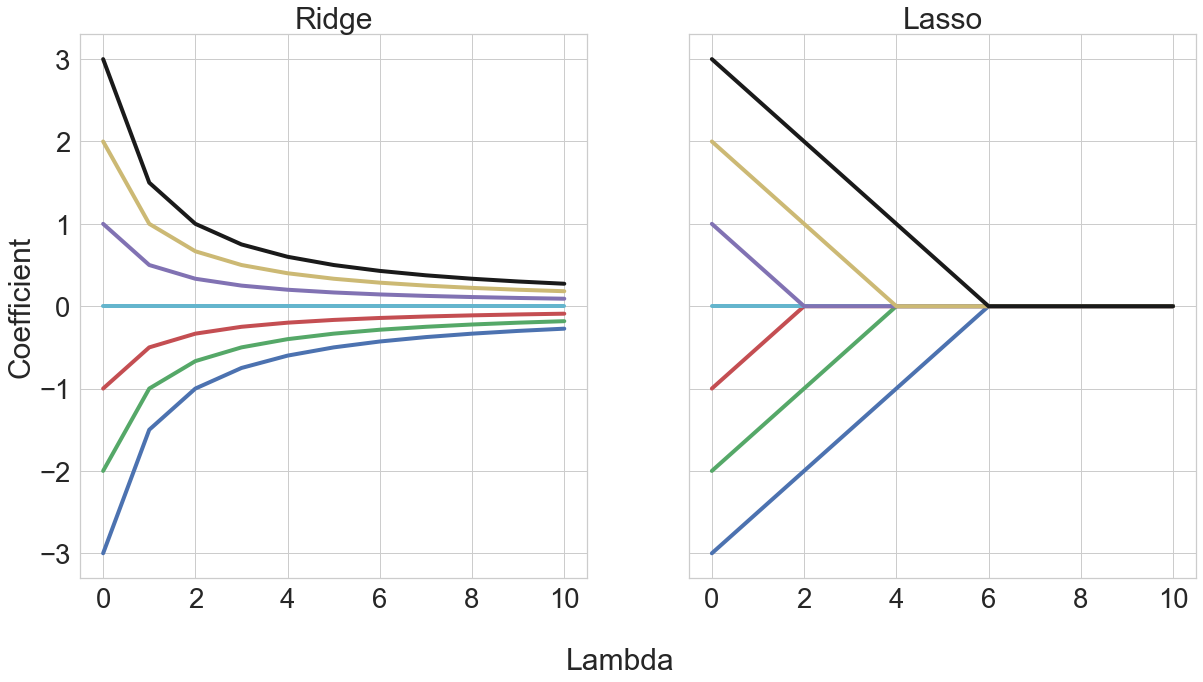

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for idx in range(coef_ridge.shape[1]):
    ax1.plot(range(coef_ridge.shape[0]), coef_ridge[:, idx], c=colors[idx], lw=4)
ax1.set_title('Ridge')
ax1.set(xlabel='', ylabel='Coefficient')

for idx in range(coef_lasso.shape[1]):
    ax2.plot(range(coef_lasso.shape[0]), coef_lasso[:, idx], c=colors[idx], lw=4)
ax2.set_title('Lasso')
ax2.set(xlabel='', ylabel='')

fig.text(0.5, 0.01, 'Lambda', ha='center', va='center')
plt.show()

In this next chunk, the coefficients are being plotted with respect to the y values given a constant lambda. As expected, the OLS y to coefficient relationship is linear with a slope of one. The Ridge relationship, because it is strictly a shrinkage methodology, is also linear, but with a slope less than one. The Ridge coefficients are closer to zero on both the positive and negative side than the OLS coefficients. Lastly, the Lasso coefficients have a linear behavior unless the y value is between $-\lambda/2$ and $\lambda/2$, in this case -1 and 1, in which case the coefficients are zero. However, at the start, the Lasso coefficients are closer to zero than the OLS coefficients, but not as close to zero as the Ridge coefficients.

In [7]:
coef_lambda = coefs_by_y(np.arange(-3, 3.1, 0.1), 2)

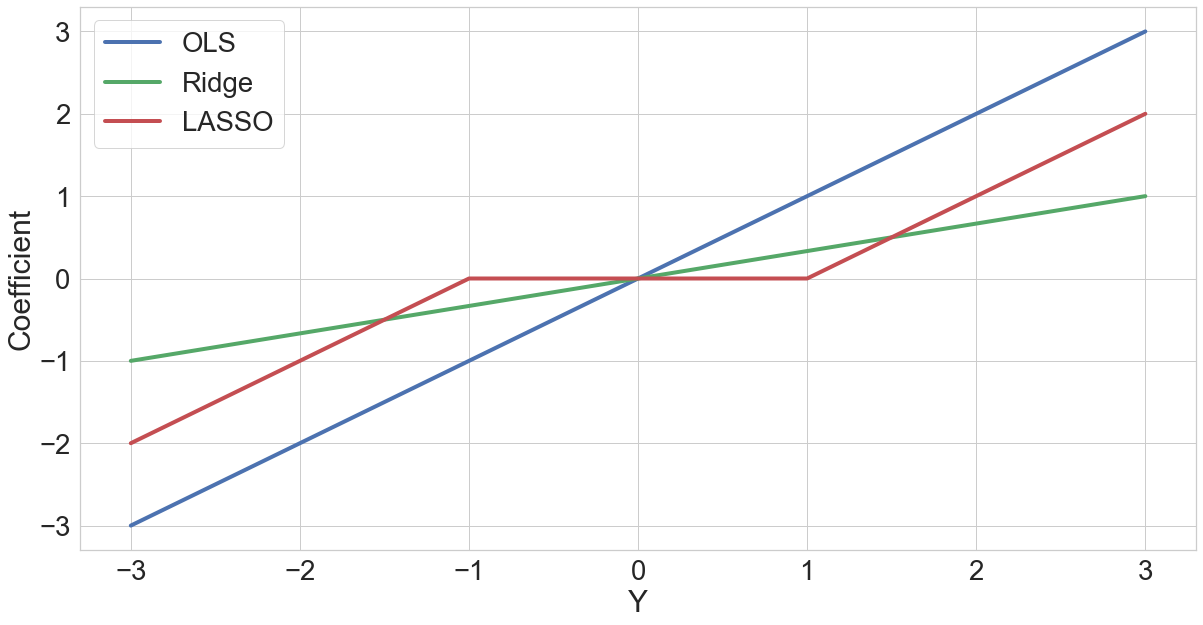

In [8]:
plt.figure()
types = {'OLS': 'b', 'Ridge': 'g', 'LASSO': 'r'}
for idx, key in enumerate(types.keys()):
    plt.plot(coef_lambda[0,:], coef_lambda[idx,:], c=types[key], lw=4, label=key)
plt.xlabel('Y')
plt.ylabel('Coefficient')
plt.legend()